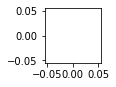

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
# force plt on windows 10
import matplotlib.pyplot as plt
plt.figure(figsize=(1,1))
plt.plot()

import sys
sys.path.append("..")

import torch
import torch.nn as nn
import numpy as np
import aggets.ds.window as window
import aggets.ds.hyper_f_load as hfl
import aggets.ds.window as window

import aggets.ds.moving as moving
import aggets.ds.aggregate3 as aggregate
import aggets.ds.hyper_f_load as hyper_f_load

## DISABLE THIS
import warnings
warnings.filterwarnings("ignore")

In [3]:
def plot(set_type, model, wg, axs, ylim=None):
    rolling = 300 if set_type == 'train' else 100
    aucs = wg.plot(model=model, model_data_fn=None, last_train=False, lr0=False, lr_t0=True,  # set_type=='train',
                   set_type=set_type, no_lr=False, model_resid=False, rolling=rolling, axs=axs,
                   plot_box_auc=False, lr_tn=10, train=0.5)

    vals = {}
    for key in aucs:
        if '=' in key:
            into = key[key.index('=') - 1:]
        else:
            into = key
        arr = vals.get(into, [])
        arr.append(np.mean(aucs[key].to_numpy()))
        vals[into] = arr
    if ylim is not None:
        plt.ylim(*ylim)
    plt.sca(axs[-1])
    plt.boxplot(list(vals.values()), showfliers=True)
    plt.xticks(range(1, len(vals.keys()) + 1), vals.keys(), rotation=90)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.ylabel('AUC')

 w 3ciej komórce notebook zawiera definicje generatorów danych

In [4]:
data = hyper_f_load.load()

wg = aggregate.WindowGenerator(chunk_size=500, samples=5, sample_frac=0.8, 
                               input_sequence_length=10,
                               df =  data['df'], # full columns information
                               train_df = data['train'],
                               val_df = data['val'],
                               test_df = data['test'],
                               label_columns=['class'],
                               bin_count=1, discretization=20)

wg_tmp = aggregate.WindowGenerator(chunk_size=500, samples=5, sample_frac=0.8, 
                               input_sequence_length=10,
                               df =  data['df'], # full columns information
                               train_df = data['train'],
                               val_df = data['val'],
                               test_df = data['test'],
                               label_columns=['class'],
                               bin_count=1, discretization=20)

komórka 4ta inicjuje struktury danych (histogramy i regresje) dla generatora. Komórkę należy uruchomić raz i zakomentować.

In [5]:
# wg.init_structures()

komórka 5ta to zapis i odczyt zainicjowanych wcześniej struktur. Uruchamiamy raz, następnie komentujemy zapis (zostawiamy odczyt)

In [6]:
import aggets.util as util
#util.save(wg, path='window_08.bin') # chunk_size=500, samples=5, sample_frac=0.8, bin_count=1, discretization=20 (lr trains on data without bins), no normalization of aggregates, density included
wg_tmp.load_data(util.load(path='window_08.bin'))

In [7]:
wg_tmp.density = True
wg_tmp.density_encoded = True
wg_tmp.one_row_ts = True

wg_tmp.reverse_train = True
wg_tmp.shuffle_input = False
wg_tmp.shuffle_output = False
wg_tmp.double_target = False
wg_tmp.train_histograms = False

dim_p = wg_tmp.test_agges.shape[-1]
dim_d = wg_tmp.test_agges.shape[-1]
dim_lr = wg_tmp.test_lr.shape[-1]

config in=10, out=5
training model lstm
epoch 0 batch 200 loss=0.0159, MTL=0.019, MVL=0.0493				
epoch 0 batch 400 loss=0.0175, MTL=0.0186, MVL=0.0493				
saving model MTL=0.018559087295833693, MVL=0.015760200311903092
*epoch 1 batch 600 loss=0.0172, MTL=0.0183, MVL=0.0158				
*epoch 1 batch 800 loss=0.0173, MTL=0.0182, MVL=0.0158				
epoch 2 batch 1000 loss=0.016, MTL=0.0175, MVL=0.0162				
epoch 2 batch 1200 loss=0.0173, MTL=0.0169, MVL=0.0162				
epoch 3 batch 1400 loss=0.0172, MTL=0.0161, MVL=0.0169				
epoch 3 batch 1600 loss=0.0169, MTL=0.0161, MVL=0.0169				
epoch 4 batch 1800 loss=0.0164, MTL=0.016, MVL=0.0161				
epoch 4 batch 2000 loss=0.0132, MTL=0.016, MVL=0.0161				


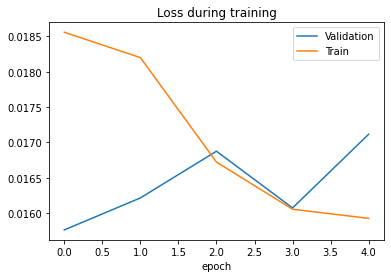

epoch 0 batch 200 loss=0.0199, MTL=0.0182, MVL=0.0158				
epoch 0 batch 400 loss=0.0195, MTL=0.0182, MVL=0.0158				
epoch 1 batch 600 loss=0.0169, MTL=0.018, MVL=0.0158				
epoch 1 batch 800 loss=0.0191, MTL=0.0182, MVL=0.0158				
epoch 2 batch 1000 loss=0.0164, MTL=0.0181, MVL=0.0158				
epoch 2 batch 1200 loss=0.0186, MTL=0.0181, MVL=0.0158				
saving model MTL=0.018081805993551196, MVL=0.015634444908651172
*epoch 3 batch 1400 loss=0.0179, MTL=0.0176, MVL=0.0156				
*epoch 3 batch 1600 loss=0.0189, MTL=0.017, MVL=0.0156				
epoch 4 batch 1800 loss=0.0158, MTL=0.0163, MVL=0.0162				
epoch 4 batch 2000 loss=0.0165, MTL=0.0161, MVL=0.0162				


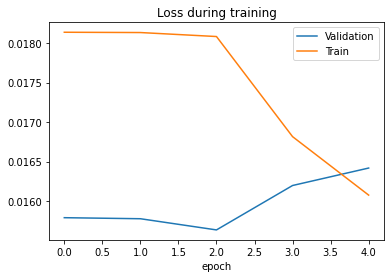

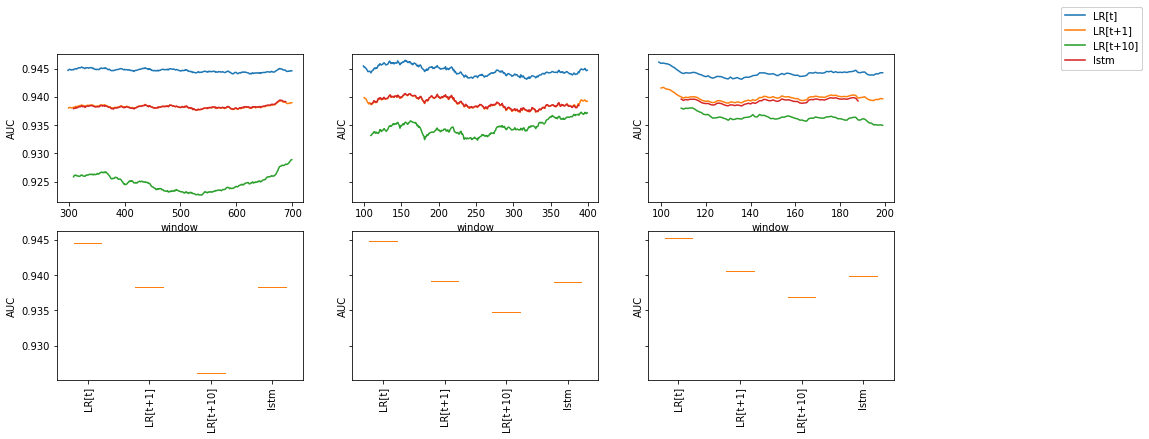

In [8]:
import aggets.model.aggregate as m_agg
import aggets.train as train

wg_tmp.input_sequence_length = 10

model = m_agg.AutoregLstmLr(dim_p + dim_d, dim_lr, num_layers=2, hidden=128,
                            output_sequence_length=5, return_deltas=False)
model0.name=f'lstm-val-true'
train.train_window_models([model], wg_tmp, patience=5, validate=True, weight_decay=0, max_epochs=5,
                          lrs=[0.001, 0.0001])
model1.name=f'lstm-val-false'
train.train_window_models([model], wg_tmp, patience=5, validate=False, weight_decay=0, max_epochs=5,
                          lrs=[0.001, 0.0001])
model.window_config.output_sequence_length = 1
model.return_deltas = False

# przyjmuje wiecej niz jeden model
def plot_only(models, wg, ylim=None):
    _, axs = plt.subplots(ncols=3, nrows=2, sharey='row', figsize=(15,6))
    plot('train', models, wg, axs=[axs[0][0], axs[1][0]], ylim=ylim)
    plot('val',   models, wg, axs=[axs[0][1], axs[1][1]], ylim=ylim)
    plot('test',  models, wg, axs=[axs[0][2], axs[1][2]], ylim=ylim)
plot_only([model0, model1, ....], wg_tmp)

wziac do 3 modeli i pobawic sie z parametrami, a na koncu wyplotowanie ich an jednym wykresie
model.name= parametry odwzorowane w namie

uruchamiam 1 model 5 razy, robie plot i potem kolejny

jezeli nie zmienie validate to wszystko bedzie wygladalo podobnie
patience im wiekszy tym wieksza szansa, ze uda sie poprawic, 
veight_decay, max_epchos, output_sequence_length, num_layers

problem ze zbiorem validacyjnym:


bardziej realne zadanie
- jedna część bedzie sie uczyla reg
- a druga agregatów

config in=10, out=7
training model my_model
epoch 0 batch 200 loss=0.0192, MTL=0.0203, MVL=0.049				
epoch 0 batch 400 loss=0.019, MTL=0.02, MVL=0.049				
saving model MTL=0.020001001922762145, MVL=0.016250602606063088
*epoch 1 batch 600 loss=0.0209, MTL=0.0196, MVL=0.0163				
*epoch 1 batch 800 loss=0.0192, MTL=0.0198, MVL=0.0163				
saving model MTL=0.0197503749651116, MVL=0.01608732109889388
*epoch 2 batch 1000 loss=0.0196, MTL=0.02, MVL=0.0161				
*epoch 2 batch 1200 loss=0.0182, MTL=0.0197, MVL=0.0161				
epoch 3 batch 1400 loss=0.0188, MTL=0.0198, MVL=0.0161				
epoch 3 batch 1600 loss=0.0182, MTL=0.0198, MVL=0.0161				
saving model MTL=0.019739078426643276, MVL=0.01604691130730013
*epoch 4 batch 1800 loss=0.0185, MTL=0.0198, MVL=0.016				
*epoch 4 batch 2000 loss=0.0198, MTL=0.0197, MVL=0.016				


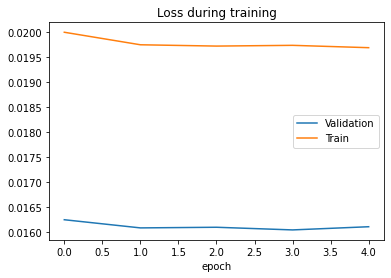

epoch 0 batch 200 loss=0.019, MTL=0.0197, MVL=0.016				
epoch 0 batch 400 loss=0.0173, MTL=0.0196, MVL=0.016				
saving model MTL=0.019649568489187034, MVL=0.016022198460996152
*epoch 1 batch 600 loss=0.0167, MTL=0.0197, MVL=0.016				
*epoch 1 batch 800 loss=0.0182, MTL=0.0196, MVL=0.016				
epoch 2 batch 1000 loss=0.0199, MTL=0.0194, MVL=0.016				
epoch 2 batch 1200 loss=0.02, MTL=0.0196, MVL=0.016				
epoch 3 batch 1400 loss=0.0197, MTL=0.0194, MVL=0.016				
epoch 3 batch 1600 loss=0.0207, MTL=0.0196, MVL=0.016				
epoch 4 batch 1800 loss=0.0212, MTL=0.0197, MVL=0.016				
epoch 4 batch 2000 loss=0.0184, MTL=0.0197, MVL=0.016				


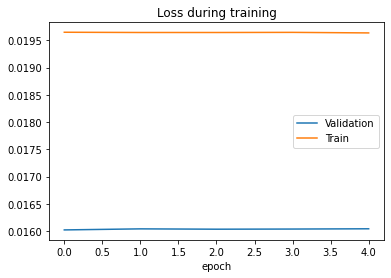

config in=10, out=5
training model my_different_model
epoch 0 batch 200 loss=0.0178, MTL=0.0188, MVL=0.042				
epoch 0 batch 400 loss=0.0199, MTL=0.0185, MVL=0.042				
saving model MTL=0.018472158345748727, MVL=0.015839818529173978
*epoch 1 batch 600 loss=0.018, MTL=0.0181, MVL=0.0158				
*epoch 1 batch 800 loss=0.016, MTL=0.0174, MVL=0.0158				
saving model MTL=0.01723369613384471, MVL=0.014783846473962556
*epoch 2 batch 1000 loss=0.0172, MTL=0.0161, MVL=0.0148				
*epoch 2 batch 1200 loss=0.0167, MTL=0.0161, MVL=0.0148				
epoch 3 batch 1400 loss=0.016, MTL=0.0161, MVL=0.0167				
epoch 3 batch 1600 loss=0.0166, MTL=0.016, MVL=0.0167				
epoch 4 batch 1800 loss=0.0164, MTL=0.0158, MVL=0.0152				
epoch 4 batch 2000 loss=0.0153, MTL=0.0158, MVL=0.0152				


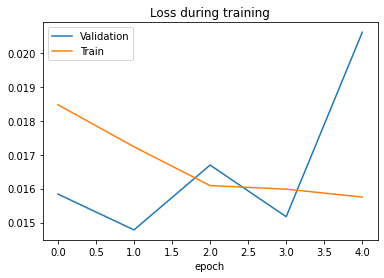

epoch 0 batch 200 loss=0.0153, MTL=0.016, MVL=0.0147				
epoch 0 batch 400 loss=0.0173, MTL=0.0159, MVL=0.0147				
epoch 1 batch 600 loss=0.0165, MTL=0.0159, MVL=0.0156				
epoch 1 batch 800 loss=0.0155, MTL=0.0159, MVL=0.0156				
epoch 2 batch 1000 loss=0.0148, MTL=0.0159, MVL=0.0156				
epoch 2 batch 1200 loss=0.0161, MTL=0.0159, MVL=0.0156				
epoch 3 batch 1400 loss=0.0166, MTL=0.0158, MVL=0.0161				
epoch 3 batch 1600 loss=0.017, MTL=0.0158, MVL=0.0161				
epoch 4 batch 1800 loss=0.0165, MTL=0.0158, MVL=0.0164				
epoch 4 batch 2000 loss=0.0167, MTL=0.0158, MVL=0.0164				


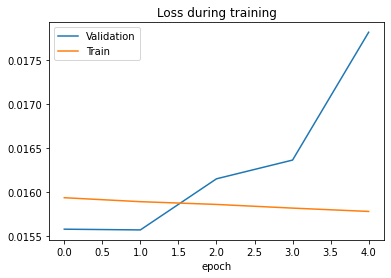

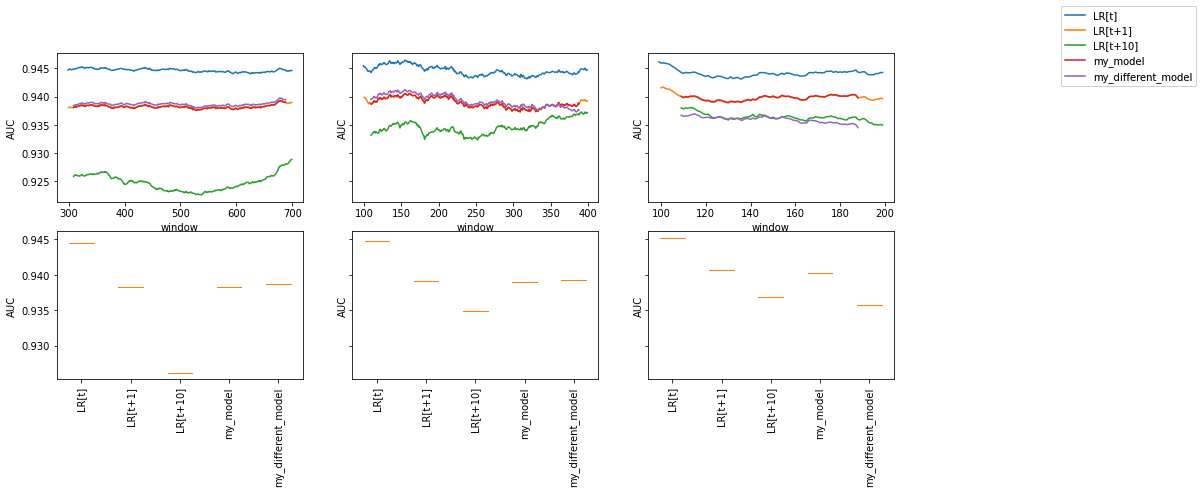

In [24]:
'''
My interpretation of the problem:
1. create 5 different models and train them
2. pick different values of:
    - 'validate',
    - 'patience',
    - 'weight_decay',
    - 'max_epchos',
    - 'output_sequence_length',
    - 'num_layers'
'''
import aggets.model.aggregate as m_agg
import aggets.train as train

wg_tmp.input_sequence_length = 10
# 1st model

my_model = m_agg.AutoregLstmLr(dim_p + dim_d, dim_lr, num_layers=4, hidden=254,
                            output_sequence_length=7, return_deltas=False)

my_model.name = 'my_model'

# 2nd model
my_different_model = m_agg.AutoregLstmLr(dim_p + dim_d, dim_lr, num_layers=2, hidden=128,
                            output_sequence_length=5, return_deltas=False)
my_different_model.name = 'my_different_model'


# training
train.train_window_models([my_model, my_different_model], wg_tmp, patience=5, validate=True, weight_decay=0, max_epochs=5,
                          lrs=[0.001, 0.0001])

# additional options
my_model.window_config.output_sequence_length = 1
my_model.return_deltas = False

my_different_model.window_config.output_sequence_length = 1
my_different_model.return_deltas = False

# plotting
plot_only([my_model, my_different_model], wg_tmp)

config in=10, out=5
training model model:2,128,5/5,True,0,5
epoch 0 batch 200 loss=0.0186, MTL=0.019, MVL=0.0477				
epoch 0 batch 400 loss=0.0173, MTL=0.0186, MVL=0.0477				
saving model MTL=0.01856070037879583, MVL=0.015802876947478194
*epoch 1 batch 600 loss=0.0193, MTL=0.0181, MVL=0.0158				
*epoch 1 batch 800 loss=0.0167, MTL=0.0182, MVL=0.0158				
saving model MTL=0.018202213325277487, MVL=0.015770862688173036
*epoch 2 batch 1000 loss=0.0167, MTL=0.0175, MVL=0.0158				
*epoch 2 batch 1200 loss=0.0143, MTL=0.0169, MVL=0.0158				
epoch 3 batch 1400 loss=0.0165, MTL=0.016, MVL=0.016				
epoch 3 batch 1600 loss=0.0162, MTL=0.0159, MVL=0.016				
epoch 4 batch 1800 loss=0.0162, MTL=0.0153, MVL=0.0187				
epoch 4 batch 2000 loss=0.0148, MTL=0.0153, MVL=0.0187				


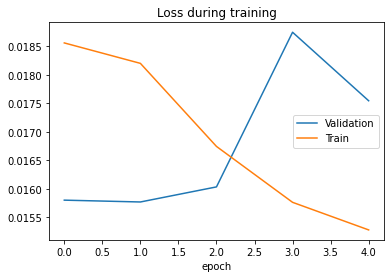

epoch 0 batch 200 loss=0.0173, MTL=0.0181, MVL=0.0158				
epoch 0 batch 400 loss=0.0161, MTL=0.0178, MVL=0.0158				
saving model MTL=0.01774636479030099, MVL=0.015091779015836169
*epoch 1 batch 600 loss=0.0159, MTL=0.0166, MVL=0.0151				
*epoch 1 batch 800 loss=0.0172, MTL=0.0165, MVL=0.0151				
epoch 2 batch 1000 loss=0.0156, MTL=0.0161, MVL=0.0153				
epoch 2 batch 1200 loss=0.0158, MTL=0.0162, MVL=0.0153				
epoch 3 batch 1400 loss=0.0164, MTL=0.0161, MVL=0.0157				
epoch 3 batch 1600 loss=0.0162, MTL=0.016, MVL=0.0157				
epoch 4 batch 1800 loss=0.015, MTL=0.0159, MVL=0.0163				
epoch 4 batch 2000 loss=0.0172, MTL=0.0158, MVL=0.0163				


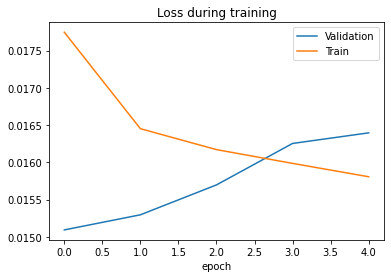

config in=10, out=5
training model model:2,128,5/5,False,0,5
using train data set to validate
epoch 0 batch 200 loss=0.0171, MTL=0.0191, MVL=0.0498				
epoch 0 batch 400 loss=0.0176, MTL=0.0186, MVL=0.0498				
saving model MTL=0.018574208670723798, MVL=0.01816469359514895
*epoch 1 batch 600 loss=0.0194, MTL=0.0182, MVL=0.0182				
*epoch 1 batch 800 loss=0.0162, MTL=0.0182, MVL=0.0182				
saving model MTL=0.01820360973701053, MVL=0.01815444871559567
*epoch 2 batch 1000 loss=0.0176, MTL=0.0178, MVL=0.0182				
*epoch 2 batch 1200 loss=0.0158, MTL=0.0171, MVL=0.0182				
saving model MTL=0.01687674536896702, MVL=0.016277812821381913
*epoch 3 batch 1400 loss=0.0173, MTL=0.0163, MVL=0.0163				
*epoch 3 batch 1600 loss=0.0166, MTL=0.016, MVL=0.0163				
saving model MTL=0.01589634400033166, MVL=0.015359286859838022
*epoch 4 batch 1800 loss=0.0144, MTL=0.0153, MVL=0.0154				
*epoch 4 batch 2000 loss=0.0156, MTL=0.0154, MVL=0.0154				
saving model MTL=0.015267115832665639, MVL=0.01474011017925882

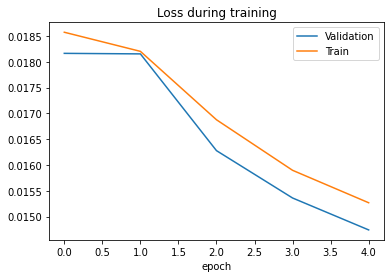

using train data set to validate
epoch 0 batch 200 loss=0.0136, MTL=0.0146, MVL=0.0147				
epoch 0 batch 400 loss=0.0136, MTL=0.0146, MVL=0.0147				
saving model MTL=0.014556749033425477, MVL=0.014469546754145458
*epoch 1 batch 600 loss=0.0149, MTL=0.0144, MVL=0.0145				
*epoch 1 batch 800 loss=0.0138, MTL=0.0144, MVL=0.0145				
saving model MTL=0.01442540261903068, MVL=0.014346843617634877
*epoch 2 batch 1000 loss=0.0148, MTL=0.0144, MVL=0.0143				
*epoch 2 batch 1200 loss=0.0153, MTL=0.0143, MVL=0.0143				
saving model MTL=0.014311673339051959, MVL=0.014245448526485412
*epoch 3 batch 1400 loss=0.0146, MTL=0.0142, MVL=0.0142				
*epoch 3 batch 1600 loss=0.0133, MTL=0.0142, MVL=0.0142				
saving model MTL=0.014197905466184192, MVL=0.01413119241044648
*epoch 4 batch 1800 loss=0.0128, MTL=0.0139, MVL=0.0141				
*epoch 4 batch 2000 loss=0.0138, MTL=0.0141, MVL=0.0141				
saving model MTL=0.01409666682862382, MVL=0.014033409564671974


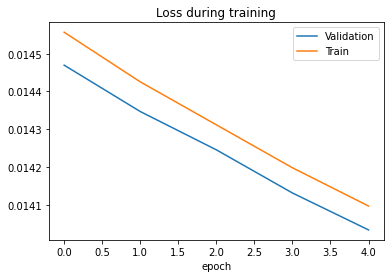

config in=10, out=5
training model model:2,128,5/7,False,0,7
using train data set to validate
epoch 0 batch 200 loss=0.0177, MTL=0.0189, MVL=0.0498				
epoch 0 batch 400 loss=0.0175, MTL=0.0186, MVL=0.0498				
saving model MTL=0.018551567565073316, MVL=0.018283894920063486
*epoch 1 batch 600 loss=0.0178, MTL=0.0182, MVL=0.0183				
*epoch 1 batch 800 loss=0.0175, MTL=0.0182, MVL=0.0183				
saving model MTL=0.018204027963221486, MVL=0.018110568267368555
*epoch 2 batch 1000 loss=0.0176, MTL=0.0177, MVL=0.0181				
*epoch 2 batch 1200 loss=0.0165, MTL=0.0171, MVL=0.0181				
saving model MTL=0.016870165039413108, MVL=0.016210340098940335
*epoch 3 batch 1400 loss=0.0156, MTL=0.016, MVL=0.0162				
*epoch 3 batch 1600 loss=0.0186, MTL=0.016, MVL=0.0162				
saving model MTL=0.01602213963969475, MVL=0.01589987923629909
*epoch 4 batch 1800 loss=0.0163, MTL=0.016, MVL=0.0159				
*epoch 4 batch 2000 loss=0.0164, MTL=0.0157, MVL=0.0159				
saving model MTL=0.015499083305909093, MVL=0.0150909391758795

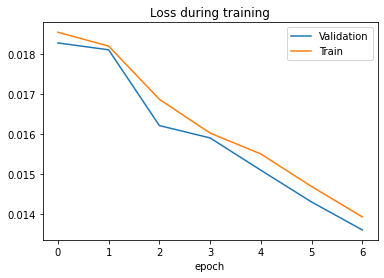

using train data set to validate
epoch 0 batch 200 loss=0.0135, MTL=0.0133, MVL=0.0136				
epoch 0 batch 400 loss=0.0126, MTL=0.0133, MVL=0.0136				
saving model MTL=0.013265844686150413, MVL=0.013184143707810042
*epoch 1 batch 600 loss=0.0125, MTL=0.0132, MVL=0.0132				
*epoch 1 batch 800 loss=0.0126, MTL=0.0131, MVL=0.0132				
saving model MTL=0.013146002434933983, MVL=0.013062014128350358
*epoch 2 batch 1000 loss=0.0133, MTL=0.013, MVL=0.0131				
*epoch 2 batch 1200 loss=0.0128, MTL=0.013, MVL=0.0131				
saving model MTL=0.013042676929324246, MVL=0.012978889596568932
*epoch 3 batch 1400 loss=0.0118, MTL=0.013, MVL=0.013				
*epoch 3 batch 1600 loss=0.0113, MTL=0.0129, MVL=0.013				
saving model MTL=0.012942099799649408, MVL=0.012864910238196614
*epoch 4 batch 1800 loss=0.013, MTL=0.0129, MVL=0.0129				
*epoch 4 batch 2000 loss=0.0121, MTL=0.0129, MVL=0.0129				
saving model MTL=0.012828850578817842, MVL=0.012756085784688558
*epoch 5 batch 2200 loss=0.012, MTL=0.0126, MVL=0.0128				


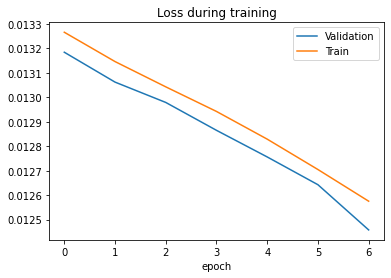

config in=10, out=5
training model model:3,128,5/5,True,0,5
epoch 0 batch 200 loss=0.0175, MTL=0.0187, MVL=0.0382				
epoch 0 batch 400 loss=0.0157, MTL=0.0185, MVL=0.0382				
saving model MTL=0.01846451231001018, MVL=0.015783193933426358
*epoch 1 batch 600 loss=0.0207, MTL=0.0182, MVL=0.0158				
*epoch 1 batch 800 loss=0.0186, MTL=0.0182, MVL=0.0158				
epoch 2 batch 1000 loss=0.0182, MTL=0.0182, MVL=0.0158				
epoch 2 batch 1200 loss=0.0179, MTL=0.0182, MVL=0.0158				
epoch 3 batch 1400 loss=0.0164, MTL=0.0182, MVL=0.0158				
epoch 3 batch 1600 loss=0.0175, MTL=0.0182, MVL=0.0158				
saving model MTL=0.018195578475712904, MVL=0.01574462772820328
*epoch 4 batch 1800 loss=0.0175, MTL=0.0184, MVL=0.0157				
*epoch 4 batch 2000 loss=0.0173, MTL=0.0182, MVL=0.0157				


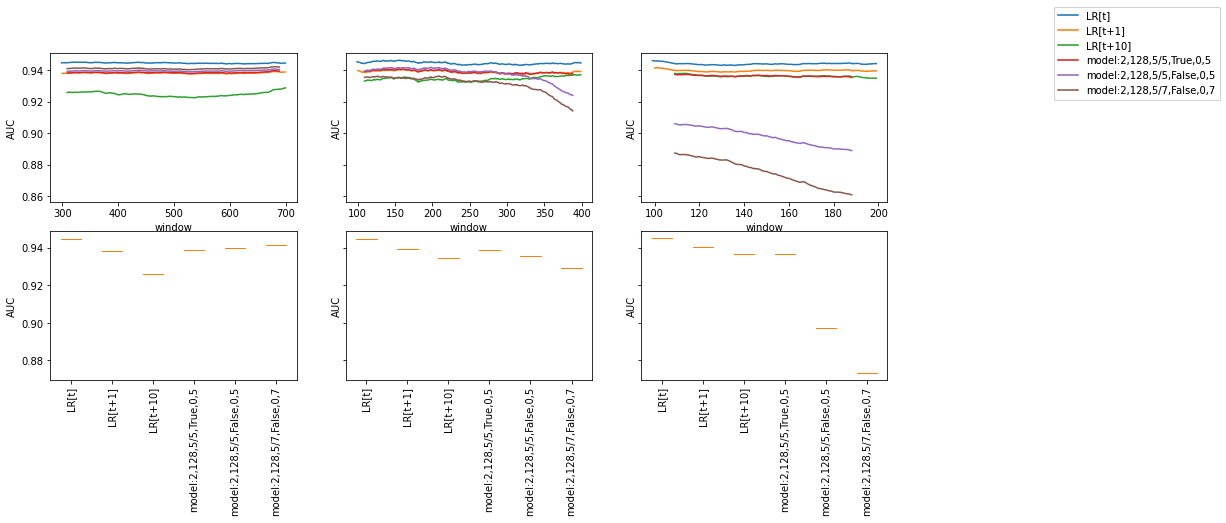

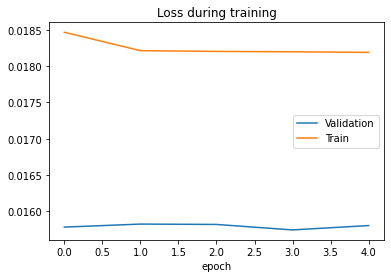

epoch 0 batch 200 loss=0.0187, MTL=0.0182, MVL=0.0157				
epoch 0 batch 400 loss=0.0192, MTL=0.0182, MVL=0.0157				
saving model MTL=0.018134956508358686, MVL=0.015699621076222327
*epoch 1 batch 600 loss=0.0197, MTL=0.0181, MVL=0.0157				
*epoch 1 batch 800 loss=0.016, MTL=0.0181, MVL=0.0157				
epoch 2 batch 1000 loss=0.0186, MTL=0.0181, MVL=0.0157				
epoch 2 batch 1200 loss=0.0179, MTL=0.0181, MVL=0.0157				
epoch 3 batch 1400 loss=0.0175, MTL=0.018, MVL=0.0157				
epoch 3 batch 1600 loss=0.0202, MTL=0.0181, MVL=0.0157				
epoch 4 batch 1800 loss=0.0199, MTL=0.0181, MVL=0.0157				
epoch 4 batch 2000 loss=0.0181, MTL=0.0181, MVL=0.0157				


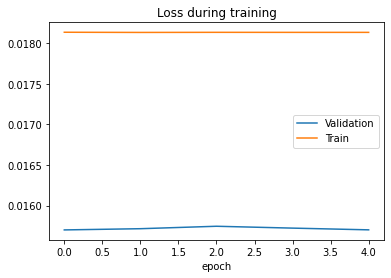

config in=10, out=5
training model model:3,128,5/5,False,0,5
using train data set to validate
epoch 0 batch 200 loss=0.0175, MTL=0.0185, MVL=0.041				


In [ ]:
'''
MODEL options:
num_of_layers, hidden, output_seq_leng, 

Training options:
patience, validate, weight_decay, max_epochs
'''
import copy

model_options = [
    (2, 128, 5), 
    (3, 128, 5)]
training_options = [
    (5, True, 0, 5), 
    (5, False, 0, 5),
    (7, False, 0, 7)]

models = []

for option in model_options:
    num_layers, hidden, output_sequence_length = option
    model = m_agg.AutoregLstmLr(dim_p + dim_d, dim_lr, num_layers=num_layers, hidden=hidden,
                            output_sequence_length=output_sequence_length, return_deltas=False)
    
    for t_option in training_options:
        patience, validate, weight_decay, max_epochs = t_option
        next_model = copy.deepcopy(model)
        next_model.name = f'model:{num_layers},{hidden},{output_sequence_length}/{patience},{validate},{weight_decay},{max_epochs}'
        train.train_window_models([next_model], wg_tmp, patience=patience, validate=validate, weight_decay=weight_decay, max_epochs=max_epochs,
                          lrs=[0.001, 0.0001])
        next_model.window_config.output_sequence_length = 1
        next_model.return_deltas = False
        models += [next_model]

    plot_only(models, wg_tmp)

    

    